# Amazon and IMDB Review Sentiment Classification using SpaCy

In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download en

In [ ]:
!python -m spacy download en_core_web_sm

## Bag of Words - The Simplest Word Embedding Technique

This is one of the simplest methods of embedding words into numerical vectors. It is not often used in practice due to its oversimplification of language, but often the first embedding technique to be taught in the classroom setting.

```
doc1 = "I am high"
doc2 = "Yes I am high"
doc3 = "I am kidding" 

```

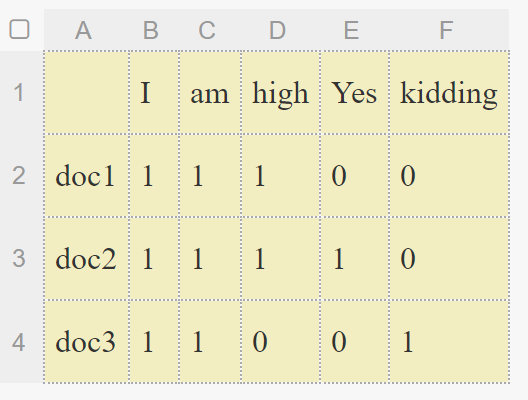

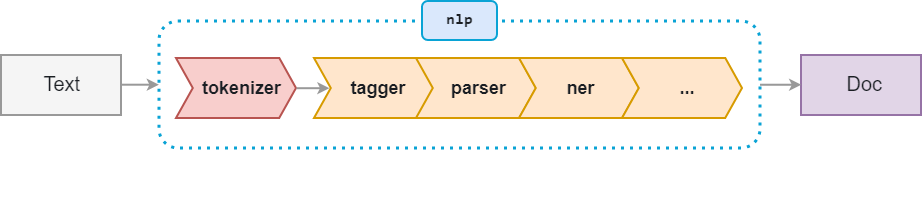

In [5]:
import spacy
from spacy import displacy

In [6]:
nlp = spacy.load('en_core_web_sm')

In [7]:
text = "Apple, This is first sentence. and Google this is another one. here 3rd one is"

In [8]:
doc = nlp(text)

In [9]:
doc

Apple, This is first sentence. and Google this is another one. here 3rd one is

In [10]:
for token in doc:
    print(token)

Apple
,
This
is
first
sentence
.
and
Google
this
is
another
one
.
here
3rd
one
is


In [11]:
sent = nlp.create_pipe('sentencizer')

In [12]:
nlp.add_pipe(sent, before='parser')

In [13]:
doc = nlp(text)

In [14]:
for sent in doc.sents:
    print(sent)

Apple, This is first sentence.
and Google this is another one.
here 3rd one is


In [15]:
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
stopwords = list(STOP_WORDS)

In [17]:
print(stopwords)

['somewhere', 'seemed', 'since', 'whereby', 'his', 'whose', 'seeming', 'should', 'wherein', 'before', 'nevertheless', 'put', 'first', 'n‘t', 'last', 'whenever', 'them', 'here', 'eleven', 'unless', 'herself', 'moreover', 'did', 'own', 'being', 'always', 'give', 'ours', 'your', 'around', 'ca', 'whence', 'on', "'d", 'anywhere', 'eight', 'amongst', 'say', '’s', '‘ve', 'noone', 'though', 'otherwise', 'least', 'therefore', 'somehow', 'or', 'was', 'another', 'ourselves', 'also', "n't", 'meanwhile', 'whereupon', 'either', 'almost', 'you', 'can', 'less', 'back', 'now', 'some', 'thus', 'seem', 'throughout', 'through', 'hereby', 'what', "'ve", 'twenty', 'cannot', 'well', 'bottom', 'does', 'toward', 'becomes', 'do', 'himself', 'often', 'anyhow', 'however', 'mine', 'already', "'re", 'had', 'even', 'must', 'it', 'be', 'via', 'whereafter', '‘m', 'sixty', 'any', 'ten', 'but', 'itself', 'elsewhere', 'regarding', 'that', 'among', 'beside', 'could', 'been', 'six', 'someone', 'whoever', 'into', 'much', 'h

In [18]:
len(stopwords)

326

In [19]:
for token in doc:
    if token.is_stop == False:
        print(token)

Apple
,
sentence
.
Google
.
3rd


### Lemmatization 

In [20]:
doc = nlp('run runs running runner')

In [21]:
for lem in doc:
    print(lem.text, lem.lemma_)

run run
runs run
running run
runner runner


### POS 

In [22]:
doc = nlp('All is well at your end!')

In [23]:
for token in doc:
    print(token.text, token.pos_)

All DET
is AUX
well ADJ
at ADP
your DET
end NOUN
! PUNCT


In [24]:
displacy.render(doc, style = 'dep')

### Entity Detection 

In [25]:
doc = nlp("New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases. At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday. The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.")

In [26]:
doc

New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases. At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday. The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.

In [27]:
displacy.render(doc, style = 'ent')

### Text Classification 

In [28]:
import pandas as pd

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
data_yelp = pd.read_csv('datasets/yelp_labelled.txt', sep='\t', header = None)

In [31]:
data_yelp.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [32]:
columns_name = ['Review', 'Sentiment']
data_yelp.columns = columns_name

In [33]:
data_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [34]:
data_yelp.shape

(1000, 2)

In [35]:
data_amazon = pd.read_csv('datasets/amazon_cells_labelled.txt', sep = '\t', header = None)
data_amazon.columns = columns_name

In [36]:
data_amazon.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [37]:
data_amazon.shape

(1000, 2)

In [38]:
data_imdb = pd.read_csv('datasets/imdb_labelled.txt', sep = '\t', header = None)

In [39]:
data_imdb.columns = columns_name

In [40]:
data_imdb.shape

(748, 2)

In [41]:
data_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [42]:
data = data_yelp.append([data_amazon, data_imdb], ignore_index=True)

In [43]:
data.shape

(2748, 2)

In [44]:
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [45]:
data['Sentiment'].value_counts()

1    1386
0    1362
Name: Sentiment, dtype: int64

In [46]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

### Tokenization 

In [47]:
import string

In [48]:
punct = string.punctuation

In [49]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [51]:
text_data_cleaning("    Hello how are you. Like this video")

['hello', 'like', 'video']

### Vectorization Feature Engineering (TF-IDF) 

In [52]:
from sklearn.svm import LinearSVC

In [53]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

In [54]:
X = data['Review']
y = data['Sentiment']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
X_train.shape, X_test.shape

((2198,), (550,))

In [57]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [58]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x000002447CBE1048>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_inter

In [59]:
y_pred = clf.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       285
           1       0.78      0.74      0.76       265

    accuracy                           0.78       550
   macro avg       0.78      0.78      0.78       550
weighted avg       0.78      0.78      0.78       550



In [61]:
confusion_matrix(y_test, y_pred)

array([[230,  55],
       [ 68, 197]], dtype=int64)

In [62]:
clf.predict(['Wow, this is amzing lesson'])

array([1], dtype=int64)

In [63]:
clf.predict(['Wow, this sucks'])

array([0], dtype=int64)

In [64]:
clf.predict(['Worth of watching it. Please like it'])

array([1], dtype=int64)

In [65]:
clf.predict(['Loved it. amazing'])

array([1], dtype=int64)